# Importing required packages 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from imblearn import under_sampling

import scikitplot as skplt

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm 
from sklearn import preprocessing
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
get_ipython().run_line_magic('matplotlib', 'inline')

plt.rc('figure',figsize=(10,6))
sns.set_context('paper',font_scale=2)

# Importing dataset

In [2]:
stroke_data = pd.read_csv('D:\Documenten\Experimentele Psychologie\Master Experimentele\CAED\healthcare-dataset-stroke-data.csv')

# Inspecting the data

In [3]:
## inspecting the first 10 rows of the data
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


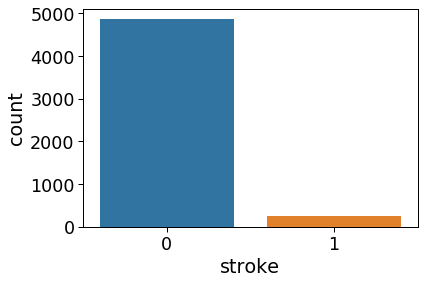

In [4]:
## checking if the dataset is balanced
stroke_data['stroke'].value_counts()
sns.countplot(stroke_data['stroke'])

In [5]:
print(stroke_data['stroke'].value_counts())

0    4861
1     249
Name: stroke, dtype: int64


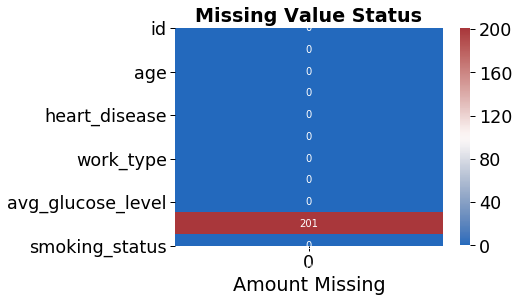

In [6]:
## checking for missing values
# option 1 
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(stroke_data.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [7]:
# option 2
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Data preprocessing

In [8]:
## filling in missing values of bmi, but not with the standard method like filling in the missing values with the mean or median
## but with a decision tree model based on gender and age of the other samples that makes a better predicition of the bmi of someone
DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = stroke_data[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
stroke_data.loc[Missing.index,'bmi'] = predicted_bmi
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.879487,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,30.556098,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


# Exploratory data analysis

In [9]:
## 1) for the categorical variables ##

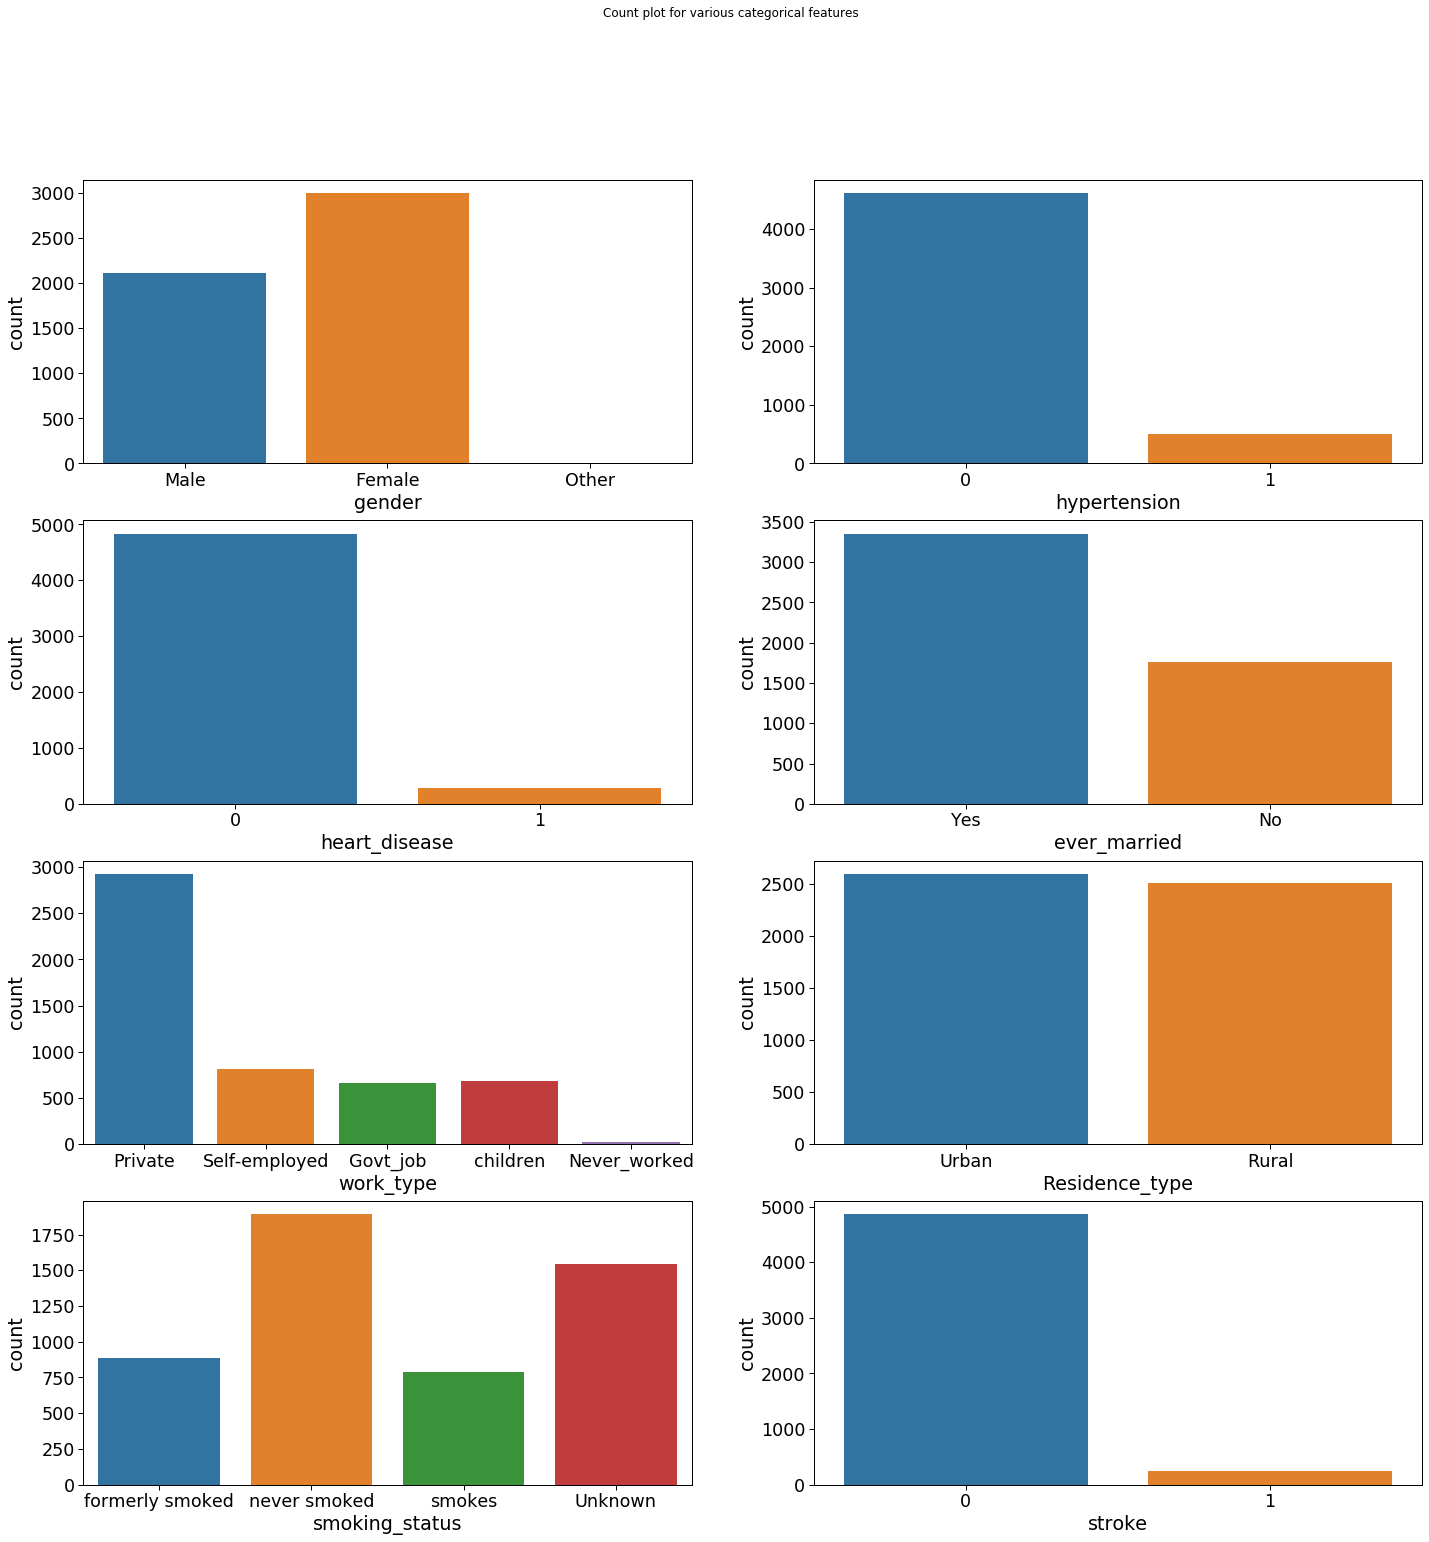

In [10]:
## count plots for the categorical features

fig,axes = plt.subplots(4,2,figsize = (24,24))
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=stroke_data,x='gender')
sns.countplot(ax=axes[0,1],data=stroke_data,x='hypertension')
sns.countplot(ax=axes[1,0],data=stroke_data,x='heart_disease')
sns.countplot(ax=axes[1,1],data=stroke_data,x='ever_married')
sns.countplot(ax=axes[2,0],data=stroke_data,x='work_type')
sns.countplot(ax=axes[2,1],data=stroke_data,x='Residence_type')
sns.countplot(ax=axes[3,0],data=stroke_data,x='smoking_status')
sns.countplot(ax=axes[3,1],data=stroke_data,x='stroke')

plt.show()

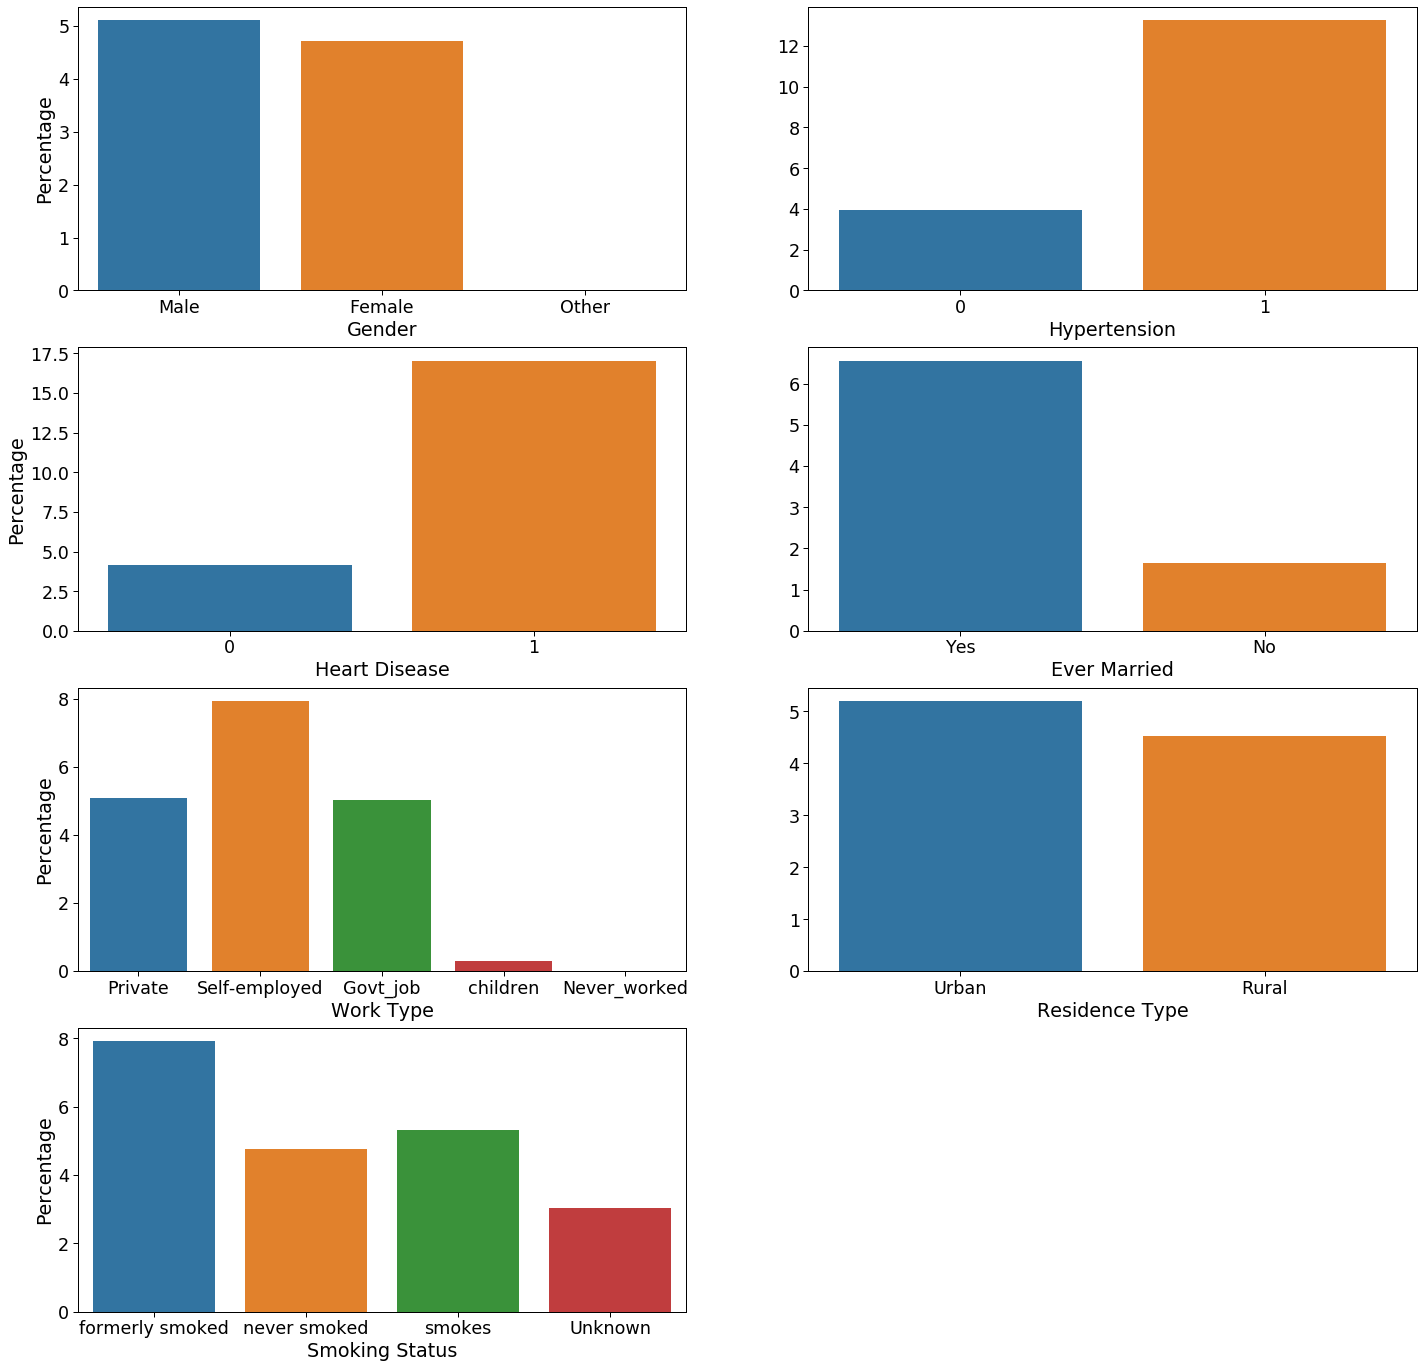

In [11]:
## looking at the percentages of stroke individuals for each category of the categorical variables
## this can already be interesting to inspect wich variables seem to predict a lot
def plot_percent_of_stroke_in_each_category(stroke_data, column, axis):
    x_axis = []
    y_axis = []
    
    unique_values = stroke_data[column].unique()
    
    for value in unique_values:
        stroke_yes = len(stroke_data[(stroke_data[column] == value) & (stroke_data['stroke'] == 1)])
        total = len(stroke_data[stroke_data[column] == value])
        percentage = (stroke_yes/total) * 100
        x_axis.append(value)
        y_axis.append(percentage)
    
    sns.barplot(x_axis, y_axis, ax=axis)
    
columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
           'work_type', 'Residence_type', 'smoking_status']

fig, axes = plt.subplots(4, 2, figsize=(24, 24))
axes[3, 1].remove()

plot_percent_of_stroke_in_each_category(stroke_data, 'gender', axes[0,0])
axes[0,0].set_xlabel("Gender")
axes[0,0].set_ylabel("Percentage")

plot_percent_of_stroke_in_each_category(stroke_data, 'hypertension', axes[0,1])
axes[0,1].set_xlabel("Hypertension")

plot_percent_of_stroke_in_each_category(stroke_data, 'heart_disease', axes[1,0])
axes[1,0].set_xlabel("Heart Disease")
axes[1,0].set_ylabel("Percentage")

plot_percent_of_stroke_in_each_category(stroke_data, 'ever_married', axes[1,1])
axes[1,1].set_xlabel("Ever Married")


plot_percent_of_stroke_in_each_category(stroke_data, 'work_type', axes[2,0])
axes[2,0].set_xlabel("Work Type")
axes[2,0].set_ylabel("Percentage")

plot_percent_of_stroke_in_each_category(stroke_data, 'Residence_type', axes[2,1])
axes[2,1].set_xlabel("Residence Type")

plot_percent_of_stroke_in_each_category(stroke_data, 'smoking_status', axes[3,0])
axes[3,0].set_xlabel("Smoking Status")
axes[3,0].set_ylabel("Percentage")

plt.show()

In [12]:
## 2) for the numerical variables ##

In [13]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

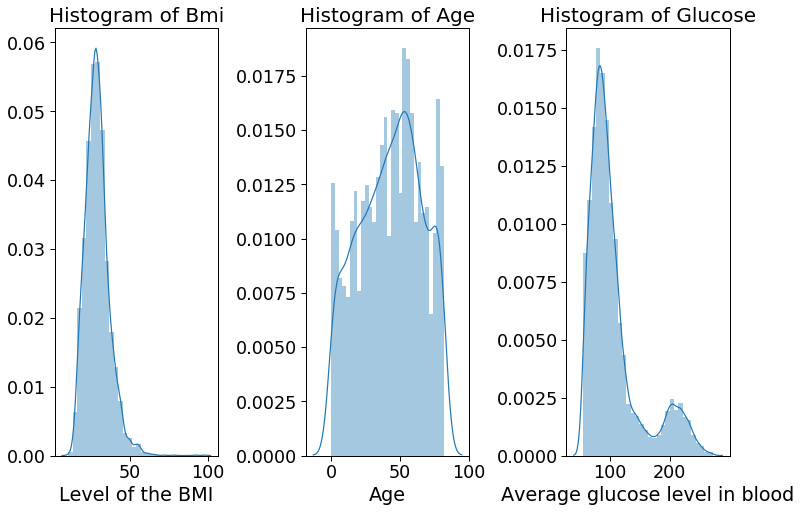

In [14]:
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
plot_hist(stroke_data.bmi,
          title='Bmi',
          xlabel="Level of the BMI",
          ax=axes[0])
plot_hist(stroke_data.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])
plot_hist(stroke_data.avg_glucose_level,
          title='Glucose', 
          xlabel='Average glucose level in blood',
          ax=axes[2])

plt.show()

In [15]:
## Remove the one row with other gender

stroke_data = stroke_data[stroke_data['gender'] != 'Other']
print(stroke_data['gender'].value_counts())

Female    2994
Male      2115
Name: gender, dtype: int64


# Downsampling the dataset to a balanced design

In [16]:
from sklearn.utils import resample
# Separate majority and minority classes
stroke_data_majority = stroke_data[stroke_data.stroke==0]
stroke_data_minority = stroke_data[stroke_data.stroke==1]
 
# Downsample majority class
stroke_data_majority_downsampled = resample(stroke_data_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=249,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
stroke_data_downsampled = pd.concat([stroke_data_majority_downsampled, stroke_data_minority])
 
# Display new class counts
stroke_data_downsampled.stroke.value_counts()

1    249
0    249
Name: stroke, dtype: int64

In [17]:
stroke_data_downsampled.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3742,29546,Male,71.0,0,0,Yes,Govt_job,Rural,99.76,33.4,formerly smoked,0
1361,33167,Female,59.0,0,0,Yes,Private,Urban,89.96,28.1,Unknown,0
1076,57497,Male,27.0,0,0,No,Private,Rural,69.70,27.3,never smoked,0
2242,13380,Male,14.0,0,0,No,children,Urban,111.27,23.2,Unknown,0
3232,20375,Female,78.0,0,0,Yes,Private,Urban,78.29,30.1,formerly smoked,0


# Seperating the downsampled dataset into target variable and feature variables

In [18]:
X = stroke_data_downsampled.drop(columns=['id', 'stroke'])
y = stroke_data_downsampled['stroke']

In [19]:
# quick check X
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3742,Male,71.0,0,0,Yes,Govt_job,Rural,99.76,33.4,formerly smoked
1361,Female,59.0,0,0,Yes,Private,Urban,89.96,28.1,Unknown
1076,Male,27.0,0,0,No,Private,Rural,69.70,27.3,never smoked
2242,Male,14.0,0,0,No,children,Urban,111.27,23.2,Unknown
3232,Female,78.0,0,0,Yes,Private,Urban,78.29,30.1,formerly smoked


In [20]:
# quick check y
y.head()

3742    0
1361    0
1076    0
2242    0
3232    0
Name: stroke, dtype: int64

In [21]:
y.value_counts()

1    249
0    249
Name: stroke, dtype: int64

# Encoding the Categorical Variables

In [22]:
## The following columns will be encoded to 0 or 1 by using LabelEncoding 
## because only two levels in the variable

label_cols = ["gender", "ever_married", "Residence_type"]
label_encoder = LabelEncoder()
for col in label_cols:
    label_encoder.fit(X[col])
    X[col] = label_encoder.transform(X[col])
X.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3742,1,71.0,0,0,1,Govt_job,0,99.76,33.4,formerly smoked
1361,0,59.0,0,0,1,Private,1,89.96,28.1,Unknown
1076,1,27.0,0,0,0,Private,0,69.70,27.3,never smoked
2242,1,14.0,0,0,0,children,1,111.27,23.2,Unknown
3232,0,78.0,0,0,1,Private,1,78.29,30.1,formerly smoked


In [23]:
## The following columns will be encoded by using OneHotEncoding
column_trans = make_column_transformer(
                (OneHotEncoder(), ['work_type', 'smoking_status']),
                remainder = 'passthrough')

In [24]:
X = column_trans.fit_transform(X)

In [26]:
print(X[:5])


[[  1.     0.     0.     0.     0.     0.     1.     0.     0.     1.
   71.     0.     0.     1.     0.    99.76  33.4 ]
 [  0.     0.     1.     0.     0.     1.     0.     0.     0.     0.
   59.     0.     0.     1.     1.    89.96  28.1 ]
 [  0.     0.     1.     0.     0.     0.     0.     1.     0.     1.
   27.     0.     0.     0.     0.    69.7   27.3 ]
 [  0.     0.     0.     0.     1.     1.     0.     0.     0.     1.
   14.     0.     0.     0.     1.   111.27  23.2 ]
 [  0.     0.     1.     0.     0.     0.     1.     0.     0.     0.
   78.     0.     0.     1.     1.    78.29  30.1 ]]


# Cross-validation

# SVM classifier

In [ ]:
# Create a pipeline that scales the data then trains a support vector classifier
svm_clf_pipeline = make_pipeline(preprocessing.StandardScaler(), svm.SVC())
# 5-fold cross validation
# applying the classifier pipeline to the feature and target data
svm_scores = cross_val_score(svm_clf_pipeline, X, y, cv=5)
svm_scores

In [ ]:
# mean score and sd
print("svm clf: %0.2f accuracy with a standard deviation of %0.2f" % (svm_scores.mean(), svm_scores.std()))

# Random Forest classifier

In [ ]:
# Create a pipeline that scales the data then trains a random forest classifier
rfc_pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier())
# 5-fold cross validation
# applying the classifier pipeline to the feature and target data
rfc_scores = cross_val_score(rfc_pipeline, X, y, cv=5)
rfc_scores


In [ ]:
# mean score and sd
print("rfc: %0.2f accuracy with a standard deviation of %0.2f" % (rfc_scores.mean(), rfc_scores.std()))

# Feature Importance RFC

In [ ]:
rfc_pipeline.fit(X,y)
rfc = rfc_pipeline['randomforestclassifier']

In [ ]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

In [ ]:
forest_importances = pd.Series(importances, index=X.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")


# Logistic regression

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV

In [ ]:
# Create a pipeline that scales the data then trains a logistic regression classifier
lr_pipeline = make_pipeline(preprocessing.StandardScaler(), LogisticRegression())
# 5-fold cross validation
# applying the classifier pipeline to the feature and target data
lr_scores = cross_val_score(lr_pipeline, X, y, cv=5)
lr_scores

In [ ]:
print("Logistic Regression clf: %0.2f accuracy with a standard deviation of %0.2f" % (lr_scores.mean(), lr_scores.std()))